In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as sklm

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=",")
df

,id,log.Te,log.light
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19
5,6,4.46,5.46
6,7,3.84,4.65
7,8,4.57,5.27
8,9,4.26,5.57
9,10,4.37,5.12


In [3]:
X = df["log.Te"].values
Y = df['log.light'].values

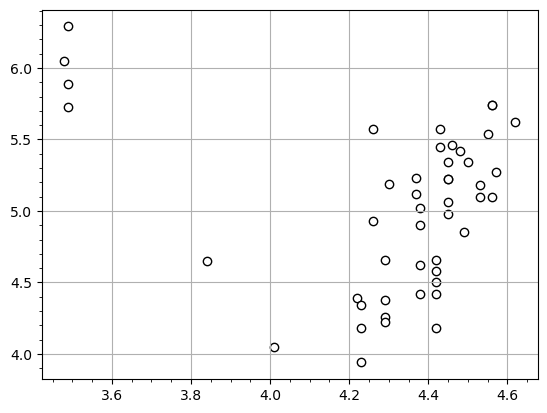

In [4]:
plt.scatter(X, Y, c='w', edgecolors='k')
plt.minorticks_on()
plt.grid(1)
plt.show()

$$
\rho(r)=\sqrt{\epsilon^2+r^2} - \epsilon
$$
$$
\varphi(r) = \rho^\prime(r)/r = \frac {1}{\sqrt{\epsilon^2+r^2}}
$$
$$
\rho''(r)=\frac{\epsilon^2}{(\epsilon^2+r^2)^{3/2}}
$$

In [5]:
class SoftAbs:
    #
    def __init__(self, eps=0.001):
        self.eps = eps
    #
    def evaluate(self, X):
        eps = self.eps
        return np.sqrt(X * X + eps * eps) - eps
    #
    def phi(self, X):
        eps = self.eps
        return 1/np.sqrt(X * X + eps * eps)
    #
    def derivative2(self, X):
        eps = self.eps
        v = np.sqrt(X * X + eps * eps)
        return eps * eps / (v * v * v)
        

In [6]:
softabs = SoftAbs(0.01)

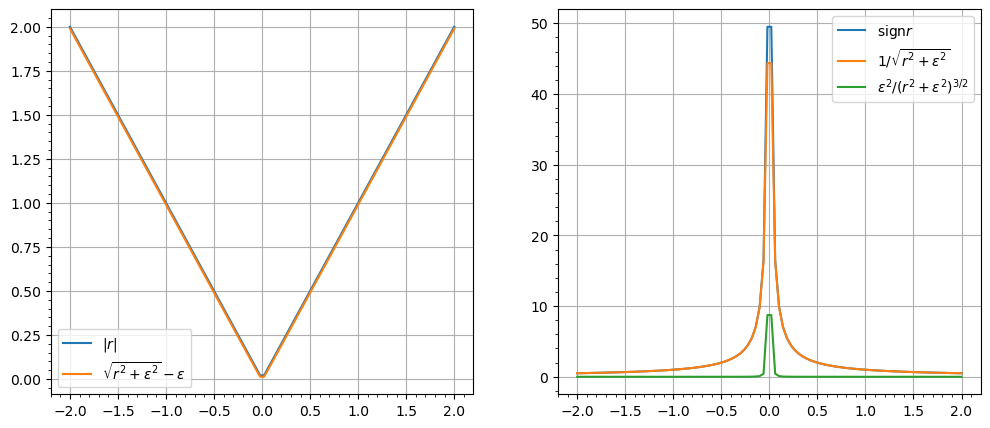

In [7]:
xrange = np.linspace(-2, 2, 100)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(xrange, np.abs(xrange), label=r'$|r|$')
plt.plot(xrange, softabs.evaluate(xrange), label=r'$\sqrt{r^2+\epsilon^2} - \epsilon$')
plt.minorticks_on()
plt.grid(1)
plt.legend()
plt.subplot(1,2,2)
plt.plot(xrange, np.sign(xrange)/xrange, label=r'$\mathrm{sign} r$')
plt.plot(xrange, softabs.phi(xrange), label=r'$1/\sqrt{r^2+\epsilon^2}$')
plt.plot(xrange, softabs.derivative2(xrange), label=r'$\epsilon^2/(r^2+\epsilon^2)^{3/2}$')
plt.minorticks_on()
plt.grid(1)
plt.legend()
plt.show()

Итерационная процедура для нахождения значения функции среднего:
$$
\mathsf{M}\{z_1,\dots,z_N\} = \arg\min_u \sum_{k=1}^N \rho(z_k-u)
$$

$$
\sum_{k=1}^N \rho'(z_k-u) = 0
$$

$$
\sum_{k=1}^N \frac{\rho'(z_k-u)}{z_k-u}(z_k-u) = 0
$$

$$
u = \frac{\sum\limits_{k=1}^N \varphi(z_k-u)z_k}{\sum\limits_{k=1}^N \varphi(z_k-u)}, \quad \varphi(r)=\rho'(r)/r
$$

$$
u_{t+1} = \frac{\sum\limits_{k=1}^N \varphi(z_k-u_t)z_k}{\sum\limits_{k=1}^N \varphi(z_k-u_t)}
$$

$$
\frac{\partial M_\rho}{\partial z_k} = \frac {\rho''(z_k-\bar z)}{\rho''(z_1-\bar z) + \cdots + \rho''(z_N-\bar z)}
$$

In [8]:
class MAverage:
    #
    def __init__(self, rho, tol=1.0e-8, n_iter=1000):
        self.rho = rho
        self.tol = tol
        self.n_iter = n_iter
        self.u = None
    #
    def evaluate(self, X):
        u = u_min = np.mean(X)
        pval = pval_min = self.rho.evaluate(X - u).sum()
        for K in range(self.n_iter):
            u0 = u
            V = self.rho.phi(X - u)
            u = np.sum(V * X) / np.sum(V)
            pval = self.rho.evaluate(X - u).sum()
            if pval < pval_min:
                pval_min = pval
                u_min = u
            if abs(u - u0) < self.tol:
                break
        self.u = u_min
        return u_min
    #
    def gradient(self, X):
        if self.u is not None:
            u = self.u
        else:
            u = self.evaluate(X)
        Z = self.rho.derivative2(X - u)
        Z /= np.sum(Z)
        self.u = None
        return Z
        

In [9]:
# class WMAverage:
    
#     def __init

In [10]:
mav = MAverage(softabs)

In [11]:
mav.evaluate(np.random.random(100))

0.5934365004469923

$$
Q(w) = M_\rho\{\dots, (f(x_k;w)-y_k)^2,\dots \}
$$

$$
\nabla Q = \sum_{k=1}^N \frac{\partial M_\rho\{z_1,\dots,z_k\}}{\partial z_k} \nabla (f(x_k;w)-y_k)^2
$$
$z_k=(f(x_k;w)-y_k)^2$.

$$
w_{t+1} = \arg \min_w \sum_{k=1}^N v_{kt} (f(x_k;w)-y_k)^2, 
$$
где
$$
v_{kt} = \frac{\partial M_\rho\{\dots,(f(x_k;w_t)-y_k)^2,\dots\}}{\partial z_k}
$$

In [12]:
class MIRLS:
    #
    def __init__(self, mav, tol=1.0e-8, n_iter=100):
        self.mav = mav
        self.tol = tol
        self.n_iter = n_iter
    #
    def fit(self, X, Y):
        regr = sklm.LinearRegression()
        regr.fit(X, Y)
        self.regr_ls = regr
        res = regr.predict(X) - Y
        res2 = res * res
        u_min = self.mav.evaluate(res2)
        weights = self.mav.gradient(res2)
        regr_min = regr
        lvals = [u_min]
        for K in range(self.n_iter):
            regr = sklm.LinearRegression()
            regr.fit(X, Y, sample_weight=weights)

            res = regr.predict(X) - Y
            res2 = res * res
            u = self.mav.evaluate(res2)
            weights = self.mav.gradient(res2)
            lvals.append(u)
            
            flag = 0
            if np.abs(u - u_min) < self.tol:
                flag = 1
            
            if u < u_min:
                # print(K, u)
                u_min = u
                regr_min = regr
                
            if flag:
                break
                
        self.K = K + 1
        self.lvals = lvals
        self.regr = regr_min
        return regr_min
        
    def predict(self, X):
        return self.regr.predict(X)

100


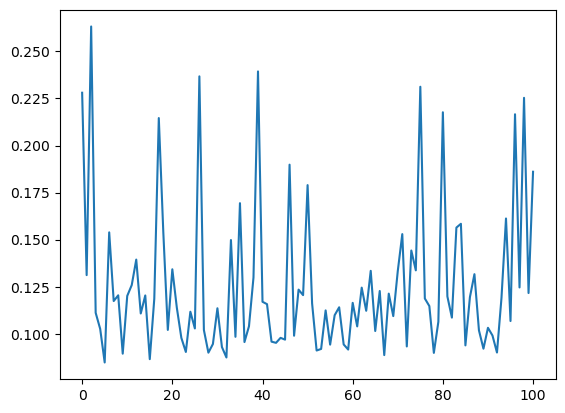

In [13]:
mirls = MIRLS(mav)
mirls.fit(X[:,None], Y)
print(mirls.K)

plt.plot(mirls.lvals)
plt.show()

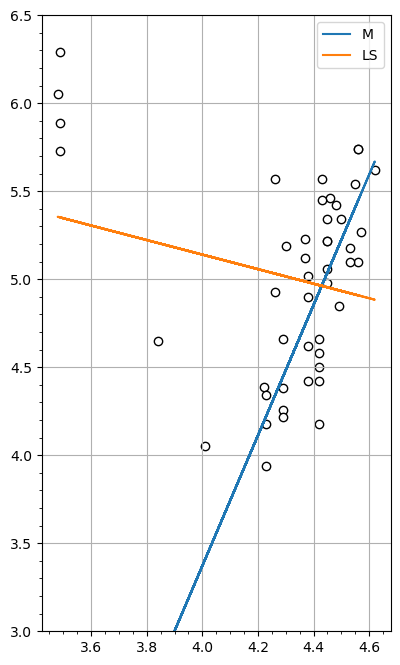

In [23]:
plt.figure(figsize=(8/(16/9), 8))
plt.scatter(X, Y, c='w', edgecolors='k')
plt.minorticks_on()
plt.grid(1)
plt.plot(X, mirls.regr.predict(X[:,None]), label='M')
plt.plot(X, mirls.regr_ls.predict(X[:,None]), label='LS')
plt.ylim(3,6.5)
plt.legend()
plt.show()

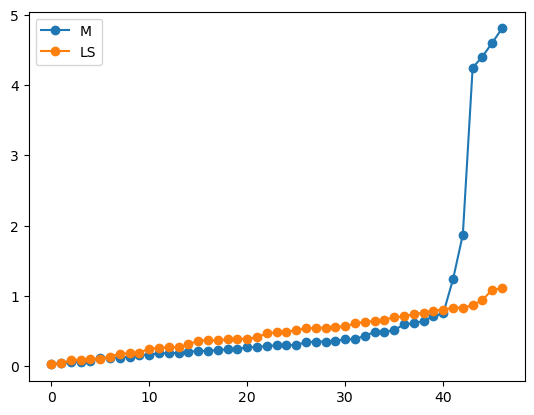

In [27]:
plt.plot(sorted(np.abs(mirls.regr.predict(X[:,None]) - Y)), marker='o', label='M')
plt.plot(sorted(np.abs(mirls.regr_ls.predict(X[:,None]) - Y)), marker='o', label='LS')
plt.legend()
plt.show()